### Data Assignment #1 - Canada's Energy Future
<div>
  <p>
    Name: Oscar Jaimes<br />
    ID: 1576326<br />
    Course: ECON366<br />
  </p>
</div>

#### Import Required Libraries

In [700]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests
from matplotlib import pyplot as plt
from datetime import datetime
from io import BytesIO

#### Fetch Data & Setup Dataframe

In [701]:
'''
Dataset Information
---------------------
Canada’s Energy Future 2023: Energy Supply and Demand Projections to 2050 - benchmark-prices-2023
'''

DATA_URL = 'https://www.cer-rec.gc.ca/open/energy/energyfutures2023/benchmark-prices-2023.csv'
benchmark_prices = None

# fetch data from GOC and load it into pandas dataframe
response = requests.get(DATA_URL)
with BytesIO(response.content) as data:
    benchmark_prices = pd.read_csv(data)

# Filter out unwanted column 
benchmark_prices.drop('Unnamed: 0', axis=1, inplace=True)

#### Utility Functions

In [751]:
def format_table(dataframe, title, width):
    '''
    Formats a dataframe and returns a styled pandas table
    '''
    table = dataframe.style \
    .set_caption(title) \
    .hide(axis="index") \
    .format(precision=2) \
    .set_properties(**{'width': width, 'text-align': 'center'}) \
    .set_table_attributes("style='width: 100%'") \
    .set_table_styles([
        {
        'selector': 'th',
        'props': [('text-align', 'center')]
        },
        {
        'selector': 'caption',
        'props': [('text-align', 'center'), ('font-size', '16px')]
        }])

    return table


def create_line_graph(data, x, y, hue, title, y_label, caption, yticks, subtitle='', grouping=False, group_name='', legend_n_cols=1) -> None:
    '''
    Creates and shows a line graph based on the above parameters.
    This function will create a line graph based on any arbritrary data.
    '''
    palette = sns.color_palette("colorblind", n_colors=data[hue].nunique())
    set_figure_size(grouping)
    plot_line(data, x, y, hue, grouping, group_name, palette)
    set_title_and_subtitle(title, subtitle)
    set_axes(y_label, yticks)
    style_legend(grouping, legend_n_cols)
    add_caption(caption, grouping)
    set_grid_and_display()

def plot_line(data, x, y, hue, grouping, group_name, palette):
    '''
    Handles the plotting of lines on the graph, accounts for grouping scenarios
    '''
    if grouping:
        sns.lineplot(data=data, x=x, y=y, hue=hue, style=group_name, dashes=True, palette=palette)
    else:
        sns.lineplot(data=data, x=x, y=y, hue=hue, palette=palette)

def set_figure_size(grouping):
    '''
    Sets the figure size based on grouping
    '''
    if grouping:
        plt.figure(figsize=(10, 7))
    else:
        plt.figure(figsize=(10, 5))

def set_title_and_subtitle(title, subtitle):
    '''
    Inserts title and subtitle elements into the graph
    '''
    plt.gca().text(0, 1.07, title, transform=plt.gca().transAxes, fontsize=14, verticalalignment='bottom', ha='left')
    if subtitle:
        plt.gca().text(0, 1.05, subtitle, transform=plt.gca().transAxes, verticalalignment='top', ha='left')

def set_axes(y_label, yticks):
    '''
    Formats the axes on the graph
    '''
    plt.ylabel(y_label)
    plt.xlabel('')
    plt.yticks(yticks)

def style_legend(grouping, legend_n_cols):
    '''
    Styles the legend on the graph
    '''
    loc = 'upper center'
    bbox_to_anchor = (0.5 if not grouping else 0.25, -0.10)
    plt.legend(loc=loc, bbox_to_anchor=bbox_to_anchor, ncol=legend_n_cols)

def add_caption(caption, grouping):
    '''
    Controls adding a caption under the graph
    '''
    plt.text(x=1, y=-0.3 if not grouping else -0.4, s=caption, transform=plt.gca().transAxes, ha='right', va='bottom', fontsize=12)

def set_grid_and_display():
    '''
    Controls setting the grid lines on the graph and displaying the graph in a cell
    '''
    plt.grid(True, which='both', color='lightgray', linestyle='--', linewidth=0.5)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

#### Deliverable #1 - WTI Prices In Current Measure Scenario

In [752]:
# Filter the benchmark_prices table to only have WTI prices for the 'Current Measures' Scenario
current_measures_prices = benchmark_prices[benchmark_prices['Scenario'] == 'Current Measures']

# Filter the data to only incluide years that are multiples of 5,
# starting at 2020, and only for WTI prices
current_measures_prices = current_measures_prices[
    (current_measures_prices['Year'] >= 2020) & 
    (current_measures_prices['Year'] % 5 == 0) &
    (current_measures_prices['Variable'] == 'West Texas Intermediate (WTI) - 2022 US$/bbl')
]

# Remove columns other than Year and Value
current_measures_prices = current_measures_prices[['Year', 'Value']]

# Update the column names for table
current_measures_prices.columns = ['Year', 'Price ($2022/bbl)']

In [753]:
# Create and style table to show
current_measures_table = format_table(
    dataframe=current_measures_prices,
    title='West Texas Intermediate (WTI) prices ($2022 per barrel) in the Current Measures scenario of the Canadian Energy Regulator’s Canada’s Energy Future (2023) report',
    width='50%'
)

# Visualize the table
current_measures_table

Year,Price ($2022/bbl)
2020,43.66
2025,76.67
2030,72.50
2035,72.50
2040,72.50
2045,72.50
2050,72.50


#### Deliverable #2 - Crude Oil Prices in Canada Net-Zero Scenario

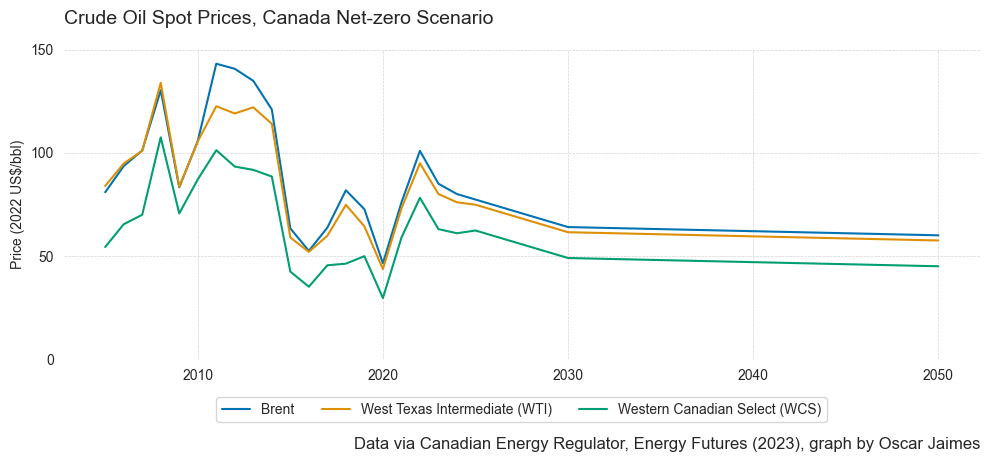

In [754]:
# filter for Canada Net-zero scenario
net_zero_prices = benchmark_prices[benchmark_prices['Scenario'] == 'Canada Net-zero'].copy()

# strip the 2022 US $/bbl from each of the variable names
net_zero_prices['Variable'] = net_zero_prices['Variable'].str.split('-').str[0].str.strip()

# filter out prices for Brent, WTI, and WCS
included = ['Brent', 'Western Canadian Select (WCS)', 'West Texas Intermediate (WTI)']
net_zero_prices = net_zero_prices[net_zero_prices["Variable"].isin(included)]

# Create & Show line graph for crude oil spot prices in Canda Net-zero Scenario
create_line_graph(
    data=net_zero_prices,
    x='Year',
    y='Value',
    hue='Variable',
    title='Crude Oil Spot Prices, Canada Net-zero Scenario',
    y_label='Price (2022 US$/bbl)',
    caption='Data via Canadian Energy Regulator, Energy Futures (2023), graph by Oscar Jaimes',
    yticks=[0, 50, 100, 150],
    subtitle=None,
    legend_n_cols=3,
    grouping=False,
    group_name=None
)

#### Deliverable #3 - Western Canadian Select (WCS) Crude Oil Prices

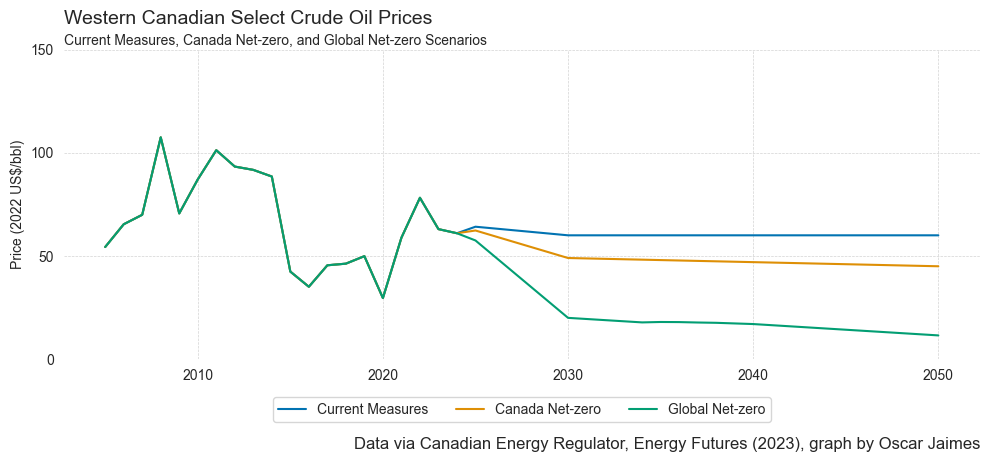

In [755]:
# filter benchmark prices to only include WCS Data
wcs_data = benchmark_prices[
    benchmark_prices["Variable"] == 'Western Canadian Select (WCS) - 2022 US$/bbl'
]

# create and show graph
create_line_graph(
    data=wcs_data,
    x='Year',
    y='Value',
    hue='Scenario',
    title='Western Canadian Select Crude Oil Prices',
    y_label='Price (2022 US$/bbl)',
    caption='Data via Canadian Energy Regulator, Energy Futures (2023), graph by Oscar Jaimes',
    yticks=[i for i in range(151) if i % 50 == 0],
    subtitle='Current Measures, Canada Net-zero, and Global Net-zero Scenarios',
    legend_n_cols=3,
    grouping=False,
    group_name=None
)

#### Deliverable #4 - Nova Inventory Transfer (NIT) Gas Prices

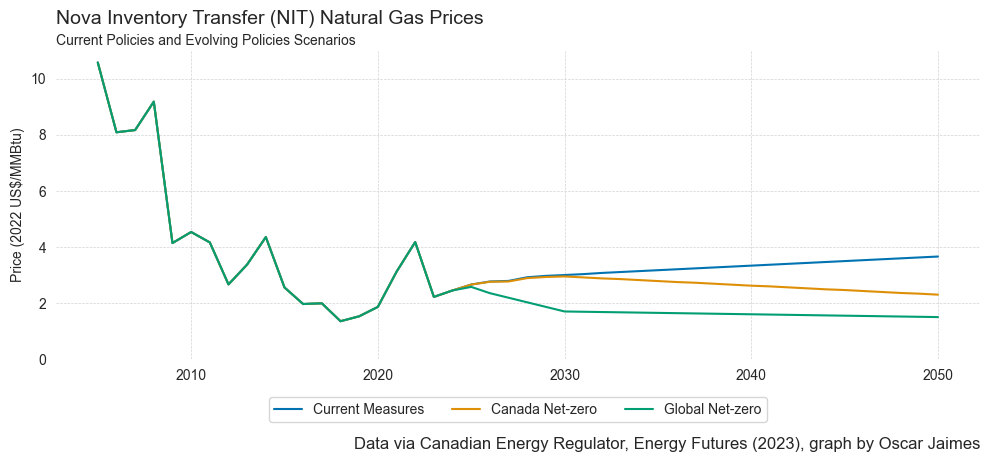

In [756]:
# filter benchmark prices to only include WCS Data
nit_data = benchmark_prices[
    benchmark_prices["Variable"] == 'Nova Inventory Transfer (NIT) - 2022 US$/MMBtu'
]

# create and show graph
create_line_graph(
    data=nit_data,
    x='Year',
    y='Value',
    hue='Scenario',
    title='Nova Inventory Transfer (NIT) Natural Gas Prices',
    y_label='Price (2022 US$/MMBtu)',
    caption='Data via Canadian Energy Regulator, Energy Futures (2023), graph by Oscar Jaimes',
    yticks=[n for n in range(11) if n % 2 == 0],
    subtitle='Current Policies and Evolving Policies Scenarios',
    legend_n_cols=3,
    grouping=False,
    group_name=None
)

#### Deliverable #5 - Challenge Graph - Crude Oil Prices in Current and Global Net-zero Scenarios

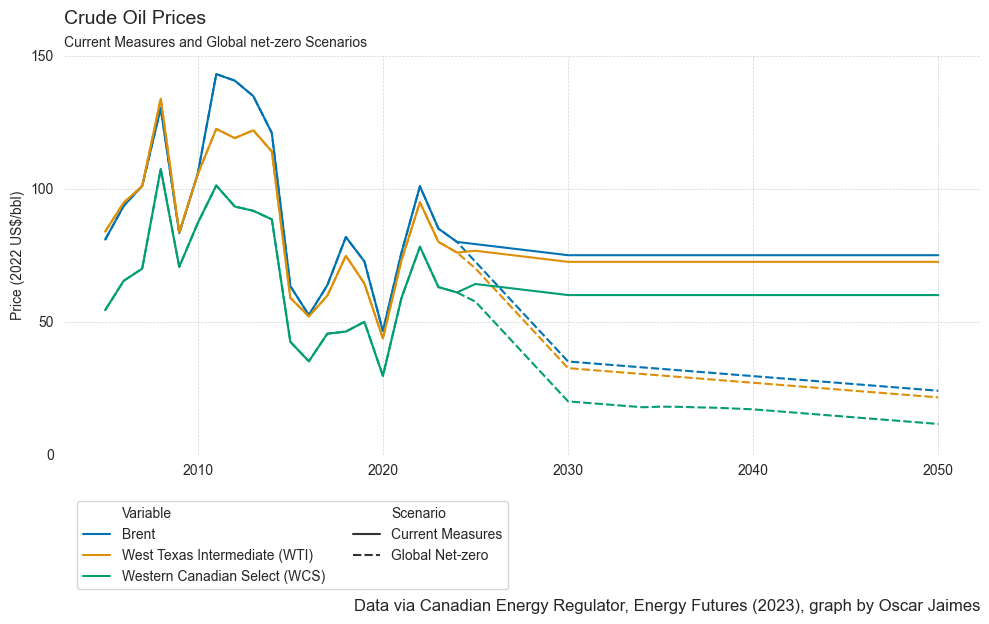

In [757]:
# filter for Current Measures and Global Net-zero scenarios
valid_scenarios = ['Current Measures', 'Global Net-zero']
oil_prices = benchmark_prices[benchmark_prices['Scenario'].isin(valid_scenarios)].copy()

# strip the 2022 US $/bbl from each of the variable names
oil_prices['Variable'] = oil_prices['Variable'].str.split('-').str[0].str.strip()

# filter out prices for Brent, WTI, and WCS
valid_types = ['Brent', 'Western Canadian Select (WCS)', 'West Texas Intermediate (WTI)']
oil_prices = oil_prices[oil_prices["Variable"].isin(valid_types)]


# Create line graph
create_line_graph(
    data=oil_prices,
    x='Year',
    y='Value',
    hue='Variable',
    title='Crude Oil Prices',
    subtitle='Current Measures and Global net-zero Scenarios',
    y_label='Price (2022 US$/bbl)',
    caption='Data via Canadian Energy Regulator, Energy Futures (2023), graph by Oscar Jaimes',
    yticks=[n for n in range(int(oil_prices['Value'].max() + 10)) if n % 50 == 0],
    grouping=True,
    group_name='Scenario',
    legend_n_cols=2
)
